In [1]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [33]:
#Load My Dataset (train file of Titanic dataset,source:kaggle)
file_path = 'C:\\Users\\Pc\\Downloads\\Lubaba2\\train.csv'
train = pd.read_csv(file_path)

In [34]:
# Inspect Data
train.head()  # Display the first few rows
train.info()  # Get info about columns and data types
train.describe()  # Summary statistics of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
#Handle Missing Values
train.isnull().sum()  # Check for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
#Depending on the case, I decided to drop the column "cabin" as it has a lot of missing values that could affect the data
train.drop('Cabin', axis=1, inplace=True)

In [37]:
#check
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [38]:
train.dropna(inplace=True)  # Drop rows with missing values

In [39]:
#check
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [41]:
#Handle Duplicates (if any)
train.duplicated().sum()  # Check for duplicates

0

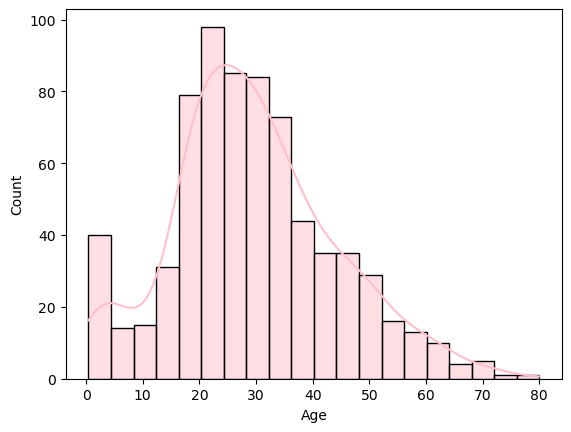

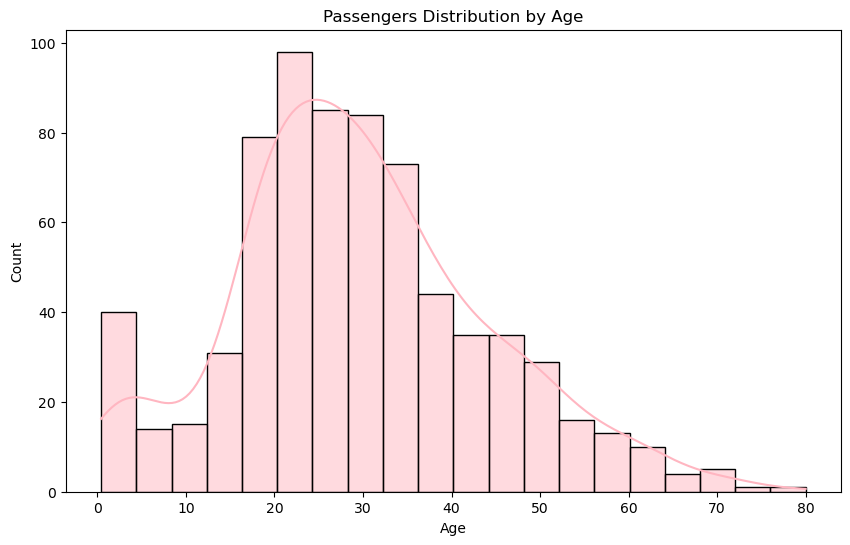

In [82]:
#Exploratory Data Analysis (EDA)
# For numerical data
sns.histplot(train ['Age']. dropna(), bins=20, kde=True, color="pink")  # Histogram
plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Create a darker shade of purple
dark_purple = sns.dark_palette("lightpink", reverse=True)[0]
# Plot the histogram with darker bins
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'].dropna(), bins=20, kde=True, color=dark_purple)
plt.title('Passengers Distribution by Age')
plt.xlabel('Age')
plt.show()

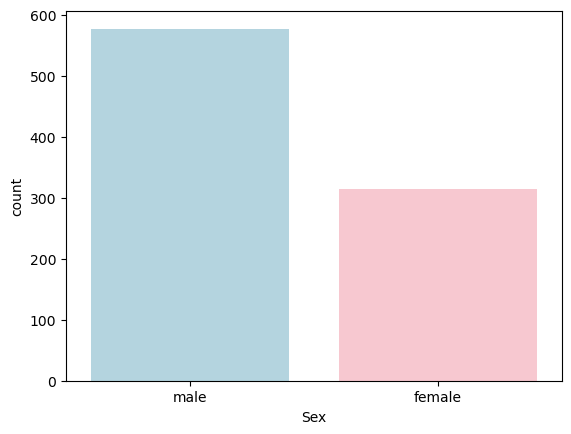

In [75]:
# For categorical data
custom_palette = {'male': 'lightblue', 'female': 'pink'}  
sns.countplot(x='Sex', data=test, palette=custom_palette)
plt.show()

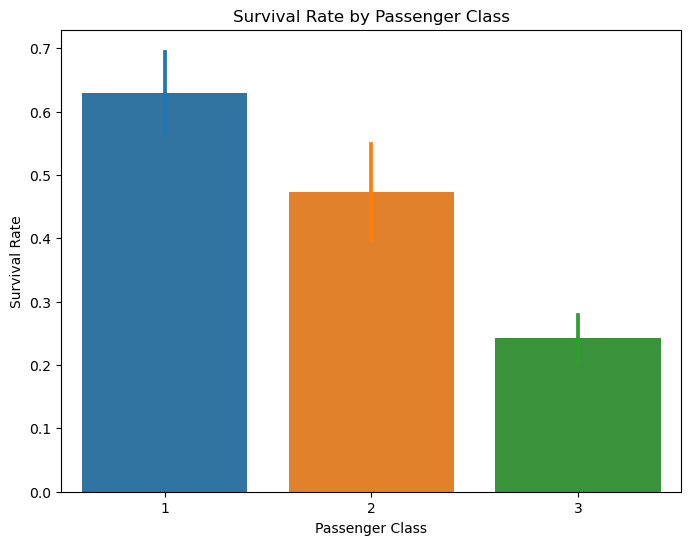

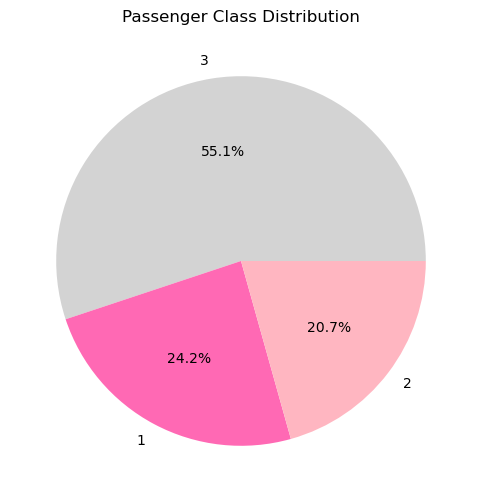

In [101]:
# Bivariate Analysis: Examine relationships between two variables
plt.figure(figsize=(8, 6))  
sns.barplot(x='Pclass', y='Survived', data=test, errcolor=None)  # Bar plot
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# For numerical vs. categorical
# Calculate the counts for each unique value in the 'Pclass' column
pclass_counts = test['Pclass'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6)) 
plt.pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', colors=['lightgray', 'hotpink', 'lightpink'])
plt.title('Passenger Class Distribution')
plt.show()


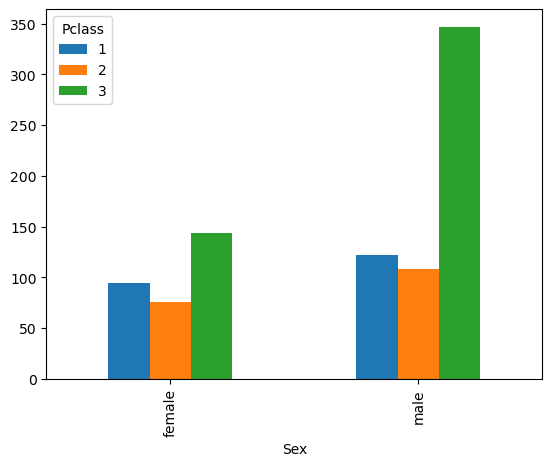

In [52]:

# For categorical vs. categorical
pd.crosstab(test['Sex'], test['Pclass']).plot(kind='bar')  # Crosstab plot
plt.show()


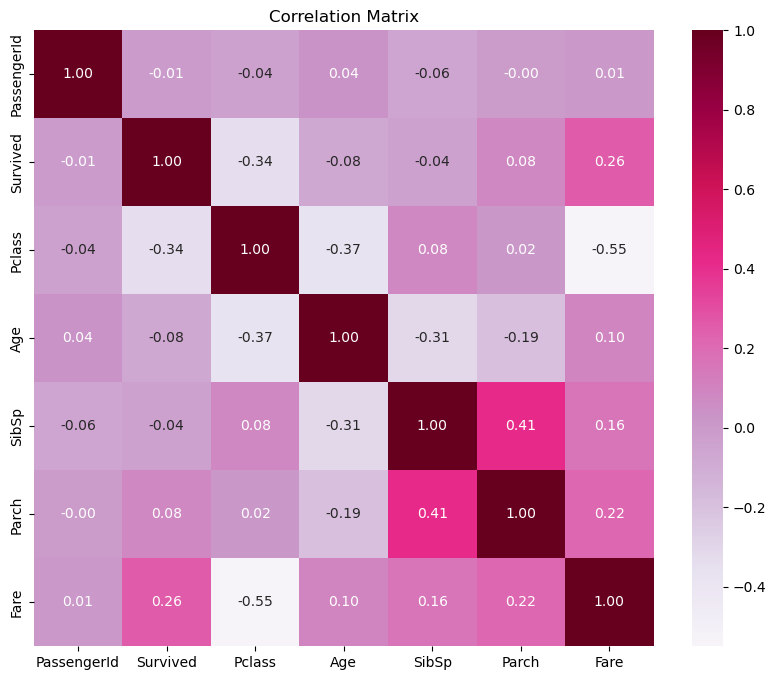

In [109]:
# Selecting only numeric columns
numeric_columns = test.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuRd', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
